In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import ast
sys.path.append('../../')
from utils.constants import TOOLS_ORDER, GROUPS_ORDER
from utils.dataloader import get_issues
sns.set(style='whitegrid')

issues = get_issues()
issues['refined_topic_names'] = issues['refined_topic_names'].apply(ast.literal_eval)
issues['group_names'] = issues['group_names'].apply(ast.literal_eval)

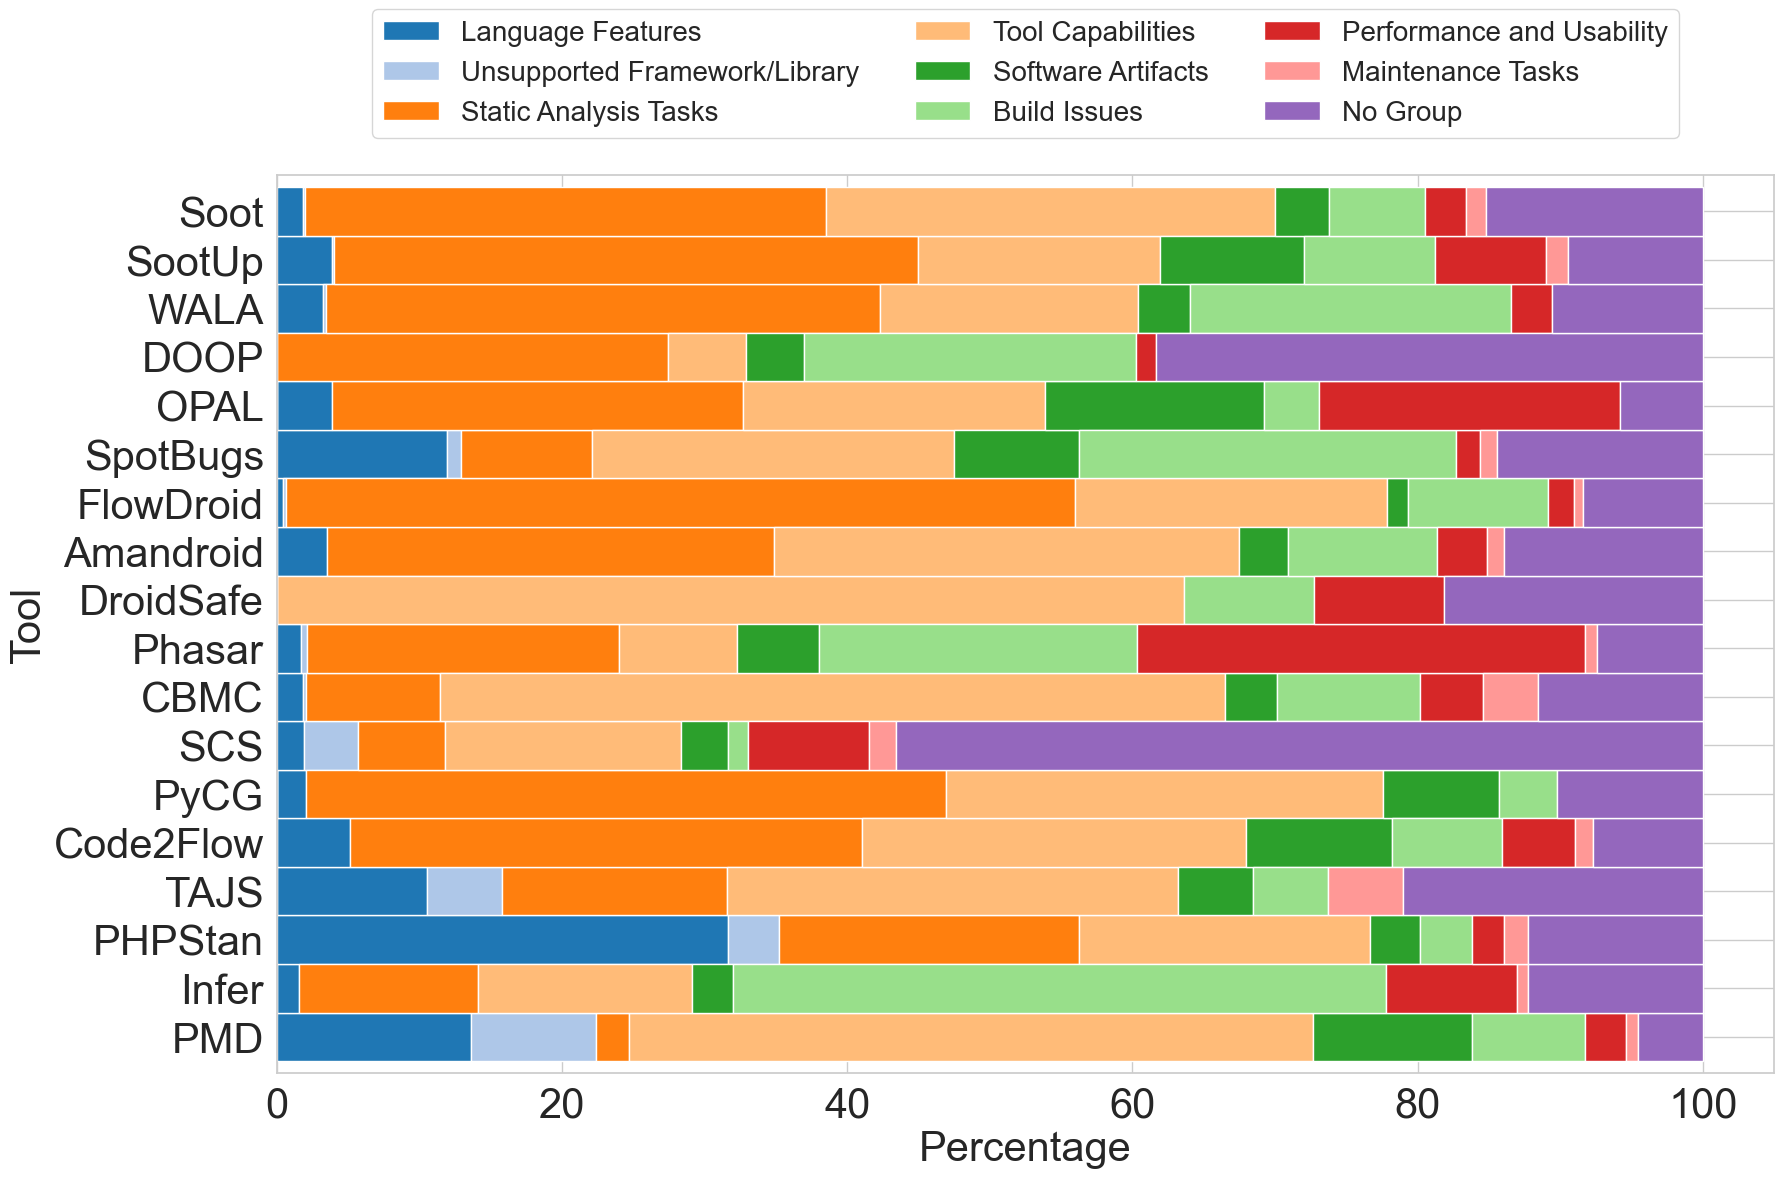

In [2]:
# Add a stacked bar graph to show the distribution of topic groups for each tool to Section 4.2, as part of the answer to RQ2.
repos = issues['tool_name'].unique()

groups_df = []

for repo in repos:
    repo_issues = issues[issues['tool_name'] == repo]

    group_counts = {}
    # get the repo distribution of the topic issues
    for index, issue in repo_issues.iterrows():
        issue_groups = issue['group_names']
        for group in issue_groups:
            if group not in group_counts:
                group_counts[group] = 0
            group_counts[group] += 1

    group_list = [repo]
    total_count = sum(group_counts.values())

    for group in GROUPS_ORDER:
        if group in group_counts:
            group_list.append(group_counts[group]/total_count * 100)
        else:
            group_list.append(0)

    groups_df.append(group_list)

groups_df = pd.DataFrame(groups_df, columns=['tool_name'] + list(GROUPS_ORDER))
ax = groups_df.set_index('tool_name').loc[TOOLS_ORDER[::-1]].plot(
    kind='barh',
    stacked=True,
    figsize=(18, 12),
    color=sns.color_palette("tab20", len(GROUPS_ORDER)),
    fontsize=25,
    width=1
)
ax.set_xlabel('Percentage', fontsize=30)
ax.set_ylabel('Tool', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3, fontsize=20)
plt.savefig('../../results/figures/topic_modeling/groups_per_repo.pdf', dpi=300)
plt.tight_layout()

In [3]:
# construct a csv matrix for the group distribution per repo
groups_df.to_csv('../../results/csv/topic_modeling/group_distribution_per_repo.csv', index=False)